In [1]:
import pickle
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.sent_spans import train

This notebook tests whether positive predictions using our inference strategy of sentence expansion (`inference.apply_sent_span_model()`) yields spans about the same length as the human suggestions used to train.

Findings: it depends on the case; sometimes the strategy ends up with longer spans, other times they're about the same. Not a big enough difference to matter for now.

In [2]:
cases = pickle.load(open('../data/cases_211222_clean.pkl', 'rb'))
sent_spans = pickle.load(open(train.SENT_SPAN_BEST_PRED_PATH, 'rb'))
docs = pickle.load(open(train.DOC_BEST_PRED_PATH, 'rb'))

AttributeError: module 'src.sent_spans.train' has no attribute 'SENT_SPAN_BEST_PRED_PATH'

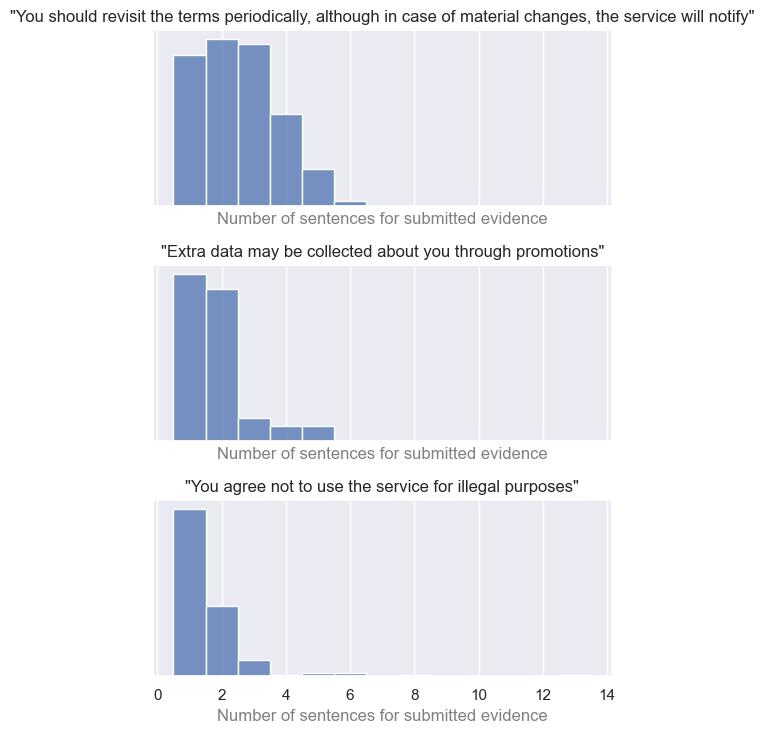

In [30]:
n_cases = 3
fig, axes = plt.subplots(3, 1, figsize=(5, n_cases * 2.5), sharex=True)
fig.subplots_adjust(top=0.8)

random.seed(4)
case_ids = list(docs.keys())
random.shuffle(case_ids)
for i ,case_id in enumerate(case_ids[:n_cases]):
    title = axes[i].set_title(f'"{cases.loc[case_id].title}"', loc='center', wrap=True)
    title.set_y(1.05)
    axes[i].set_xlabel('Number of sentences for submitted evidence', c='grey')
    axes[i].get_yaxis().set_visible(False)
    positive_sources = sent_spans[case_id][sent_spans[case_id].label == 'positive']
    sns.histplot(positive_sources.num_sents.astype(int), ax=axes[i], discrete=True, binwidth=1)
plt.tight_layout()

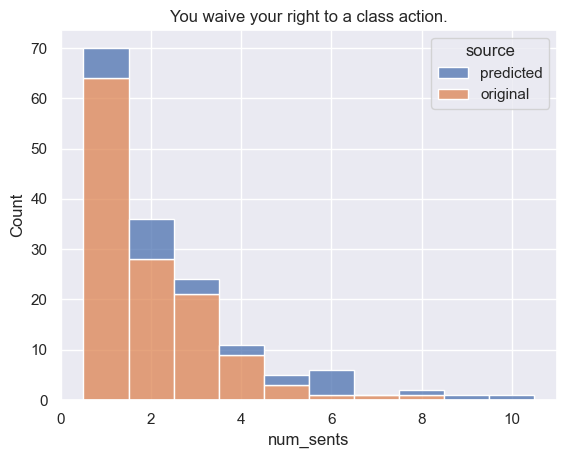

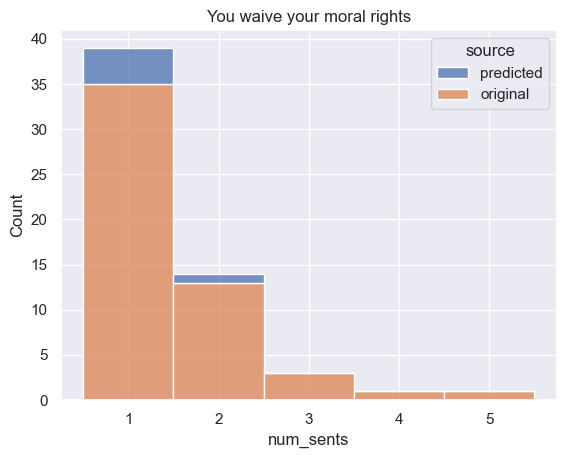

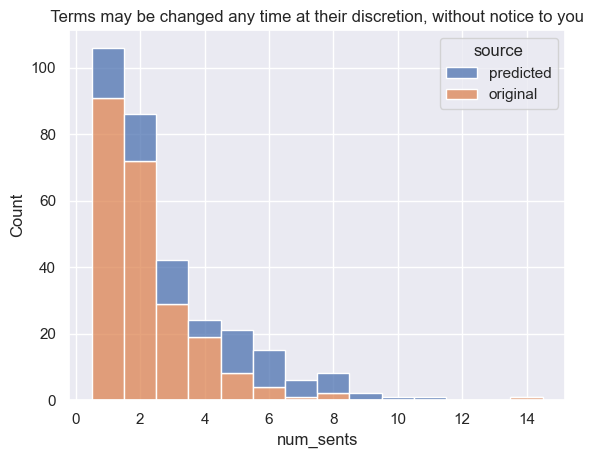

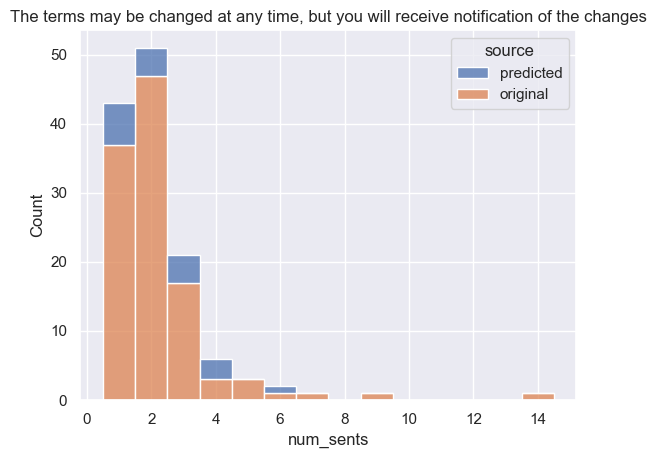

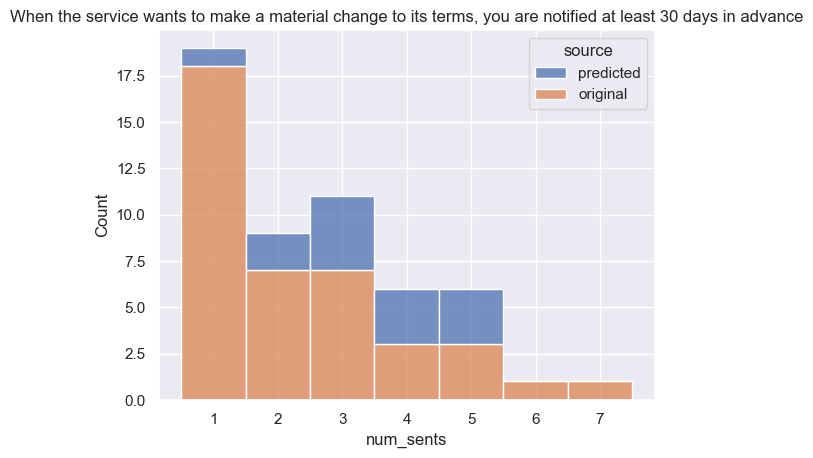

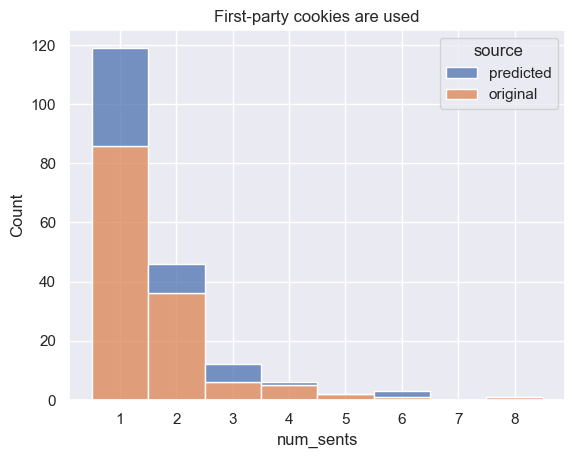

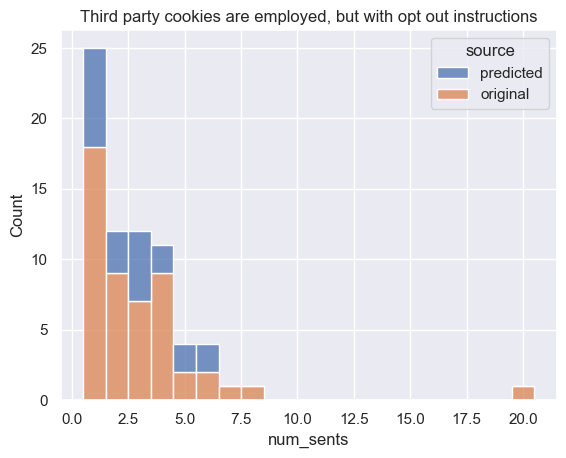

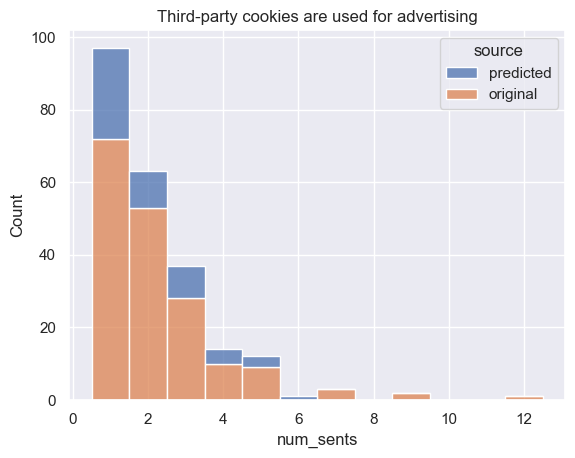

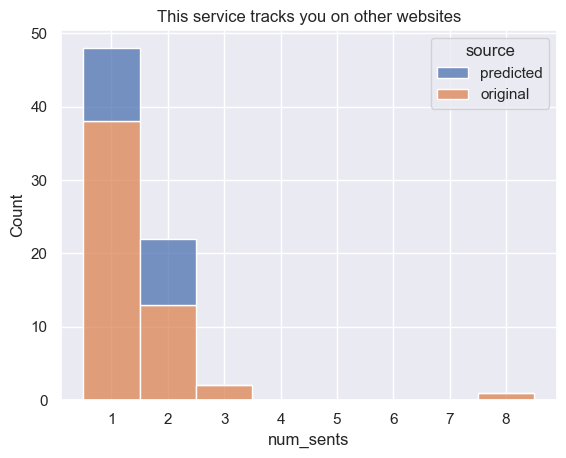

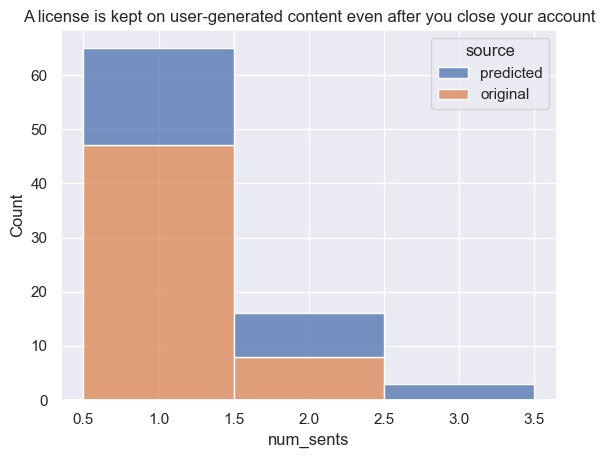

In [21]:
for case_id in list(docs.keys())[:10]:
    fig, ax = plt.subplots(1, 1)
    ax.set_title(cases.loc[case_id].title)
    predicted_pos_docs = docs[case_id][docs[case_id].pred_score >= 1.0]
    positive_sources = sent_spans[case_id][sent_spans[case_id].label == 'positive']
    num_sents = pd.DataFrame([{'num_sents': n, 'source': 'predicted'} for n in predicted_pos_docs.pred_num_sents] +
                             [{'num_sents': n, 'source': 'original'} for n in positive_sources.num_sents])
    sns.histplot(num_sents, x='num_sents', hue='source', ax=ax, discrete=True, binwidth=1, multiple='stack')